# Example how to calculate the RV precision

Simple example of how to calculate precision, No convolution or SNR scaling is preformed.

In [6]:
from eniric import precision
import matplotlib.pyplot as plt

In [2]:
# Load a spectrum
from astropy.io import fits
data = fits.getdata("/home/jneal/.handy_spectra/HD30501-1-mixavg-tellcorr_1_bervcorr.fits")
wav = data["Wavelength"]
flux = data["Flux"]
# wav = fits.getdata() / 10
# flux = fits.getdata()

print(len(flux))

1024


In [3]:
# Select a section of wavelength
xmin = 2000  # nm
xmax = 3000  # nm
mask = (wav>=xmin) & (wav<=xmax)
wav=wav[mask]
flux=flux[mask]

print(len(flux))

1024


In [4]:
rv_precision = precision.rv_precision(wavelength=wav, flux=flux)

print(f"RV precision between {xmin}-{xmax} = {rv_precision}")

RV precision between 2000-3000 = 7997.7510105689325 m / s


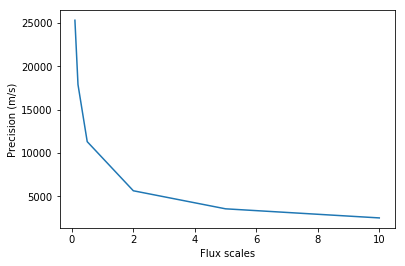

In [5]:
# The precision needs to be scaled to the relative SNR.
scales = [0.1, 0.2, 0.5, 2, 5, 10]
prec = [precision.rv_precision(wavelength=wav, flux=flux * scale).value for scale in scales]

plt.plot(scales, prec)
plt.xlabel("Flux scales")
plt.ylabel("Precision (m/s)")
plt.show()
